In [143]:
from fastai.vision.all import *
import os
from PIL import Image, ImageOps
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df1 = pd.read_csv("/kaggle/input/spr-x-ray-age/train_age.csv")
train_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")
df2 = pd.DataFrame({"name": train_files,
      "imageId": [int(x.split(".")[0]) for x in train_files]
      })

df = df1.merge(df2)[["name","age"]].head(100)

dls = ImageDataLoaders.from_df(df,
                               item_tfms=Resize(256, method="squish"),
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               seed=99,
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")                   

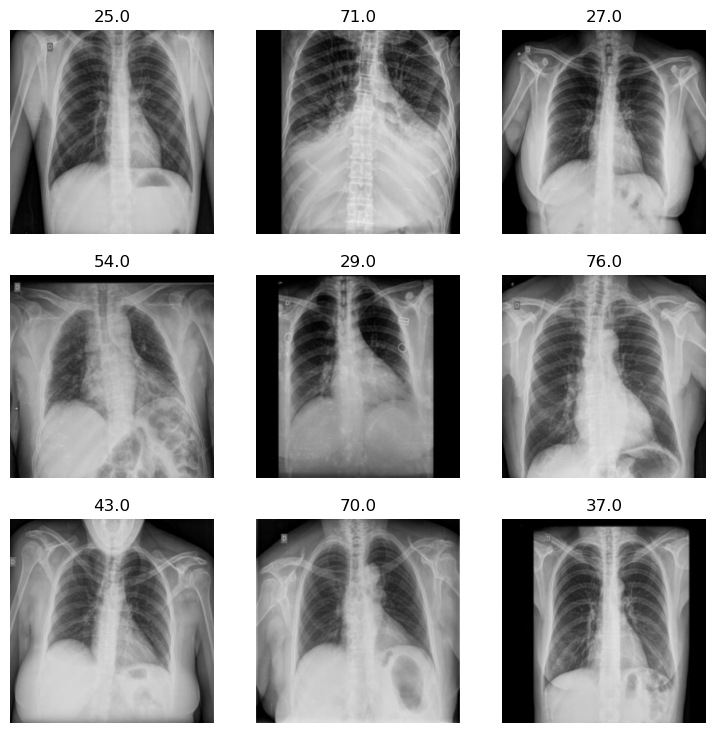

In [99]:
dls.show_batch()

It appears that not all X-rays take up the whole pixel-space. Need a strategy to get just the scan in these instances.

In [ ]:
df1 = pd.read_csv("/kaggle/input/spr-x-ray-age/train_age.csv")
train_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")

def crop_border(img):
    rows_to_remove = np.where((img <= 100).sum(axis=1) == img.shape[1])[0]
    cols_to_remove = np.where((img <= 100).sum(axis=0) == img.shape[0])[0]
    img = np.delete(img, rows_to_remove, axis=0)
    img = np.delete(img, cols_to_remove, axis=1)
    return PILImage.create(img)

for f in os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train"):
    img = cv2.imread("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/"+f, 0)
df2 = pd.DataFrame({"name": train_files,
      "imageId": [int(x.split(".")[0]) for x in train_files]
      })

df = df1.merge(df2)[["name","age"]].head(100)

dls = ImageDataLoaders.from_df(df,
                               item_tfms=Resize(256, method="squish"),
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               seed=99,
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")                   

In [206]:
img = Image.open("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000005.png")
def crop_border(img):
    print(type(img))
#     print(np.dot(np.array(img)[...,:3], [0.299, 0.587, 0.114]))
    return img
    
#     rows_to_remove = np.where((img <= 100).sum(axis=1) == img.shape[1])[0]
#     cols_to_remove = np.where((img <= 100).sum(axis=0) == img.shape[0])[0]
#     img = np.delete(img, rows_to_remove, axis=0)
#     img = np.delete(img, cols_to_remove, axis=1)
#     return PILImage.create(img)

In [205]:
dls = ImageDataLoaders.from_df(df,
                               item_tfms=[crop_border,Resize(256, method="squish")],
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               seed=99,
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train") 

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


TypeError: 'PILImage' object is not subscriptable

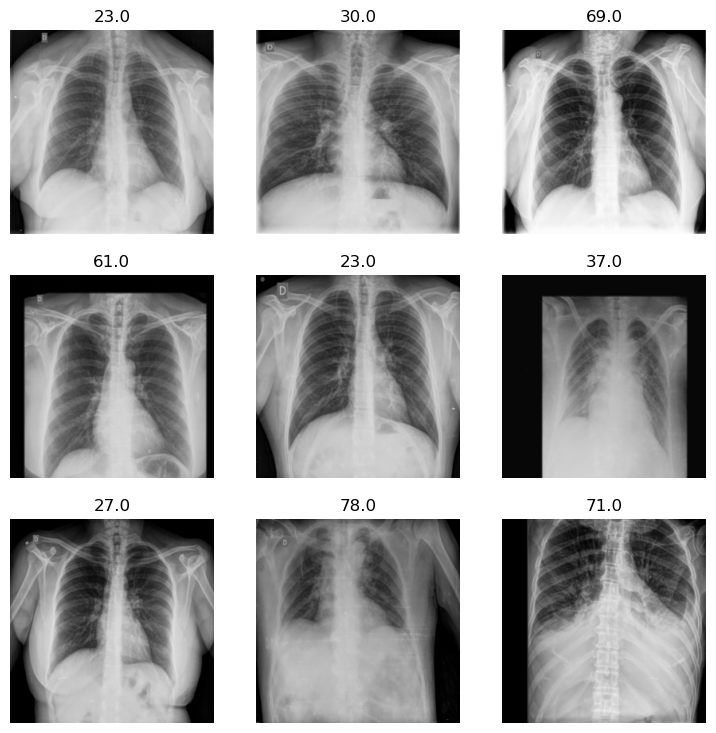

In [110]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet50, metrics=mae)
learn.fine_tune(1)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,mae,time
0,2797.177490,3815.280029,58.912598,01:00


epoch,train_loss,valid_loss,mae,time
0,2543.690186,3837.666748,59.108356,01:13


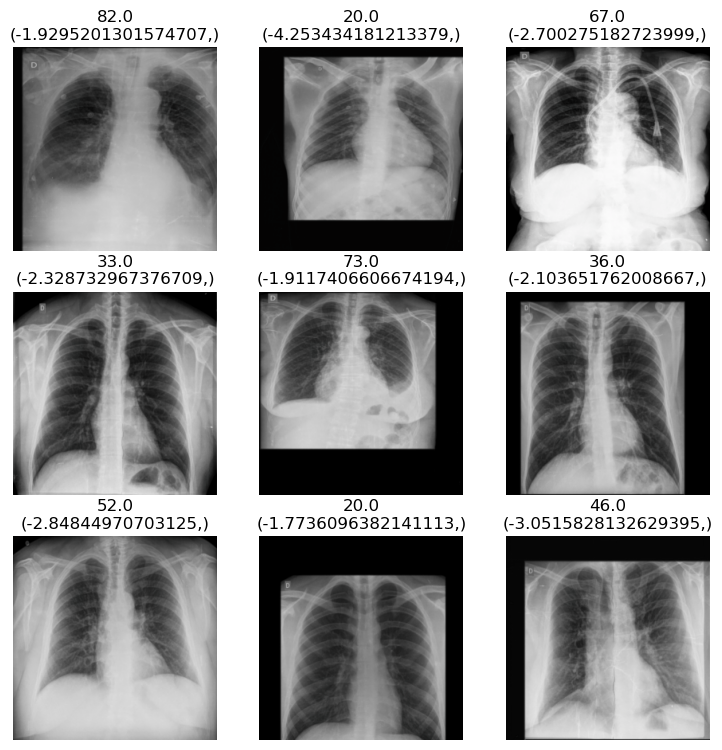

In [7]:
learn.show_results()

In [13]:
dls = ImageDataLoaders.from_df(df,
                               item_tfms=Resize(256, method="squish"),
                               batch_tfms=[Rotate(max_deg=5), 
                                             Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")    

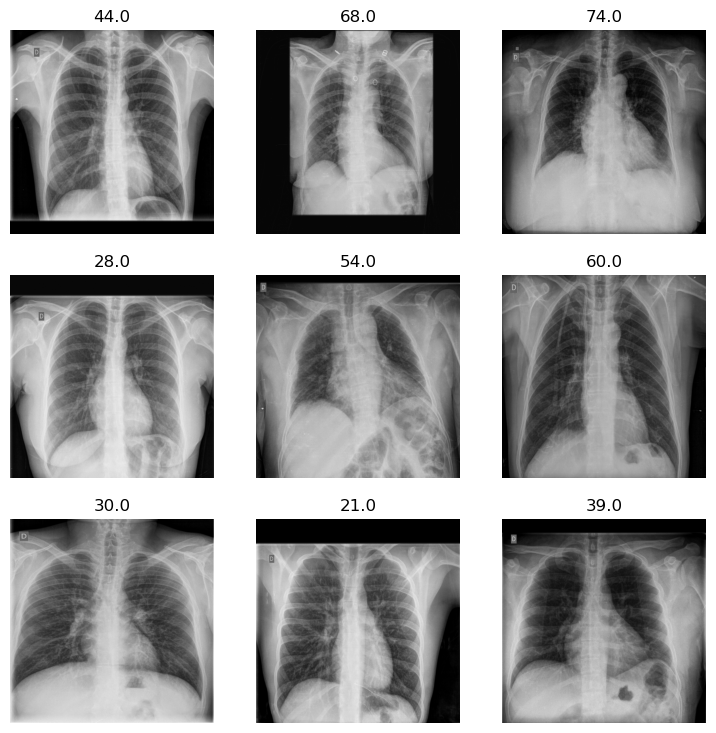

In [21]:
df1 = pd.read_csv("/kaggle/input/spr-x-ray-age/train_age.csv")
train_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")
df2 = pd.DataFrame({"name": train_files,
      "imageId": [int(x.split(".")[0]) for x in train_files]
      })

df = df1.merge(df2)[["name","age"]].head(100)

dls = ImageDataLoaders.from_df(df,
#                                item_tfms=Resize(256, method="squish"),
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")
dls.show_batch()

In [ ]:
test_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test")
preds = [float(learn.predict("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test/"+x)[1]) if
         float(learn.predict("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test/"+x)[1]) > 0 else 0 
         for x in test_files]
df = pd.DataFrame({
    "imageId": [int(x.split(".")[0]) for x in test_files],
    "age": preds
})

df.to_csv("submission.csv", index = False)

In [ ]:
learn.save("age_model", with_opt=False)